In [146]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


from skimage.morphology import footprint_rectangle
from skimage.filters.rank import mean
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_filter



# Utilizando filtros lineales, suavizantes y no lineales, así como cualquier otra operación anterior, el objetivo es tratar de restaurar la imagen a su estado original lo más fiel posible a la original. Un posible resultado aceptable puede ser.

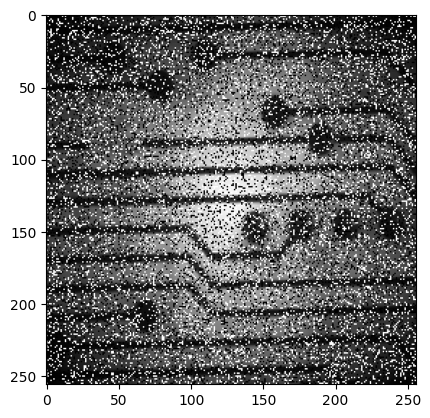

In [147]:
circuit = cv2.imread("images/circuit_noise.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(circuit, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

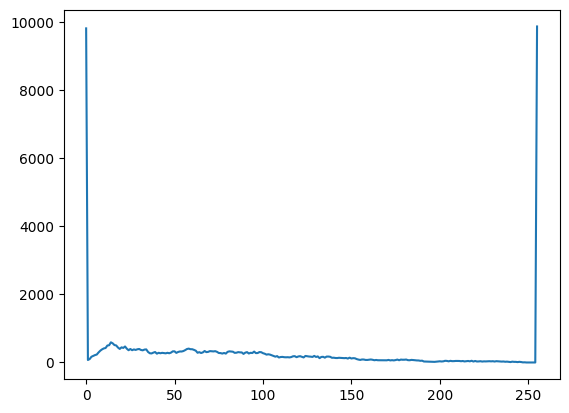

In [148]:
hist = cv2.calcHist([circuit], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

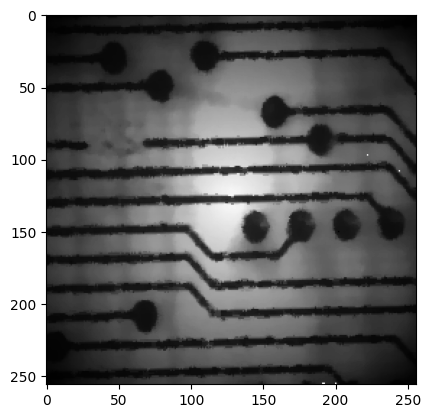

In [149]:
import cv2
import numpy as np


imagen_filtrada = cv2.medianBlur(circuit, 5)
plt.imshow(imagen_filtrada, cmap= 'gray')
plt.show()



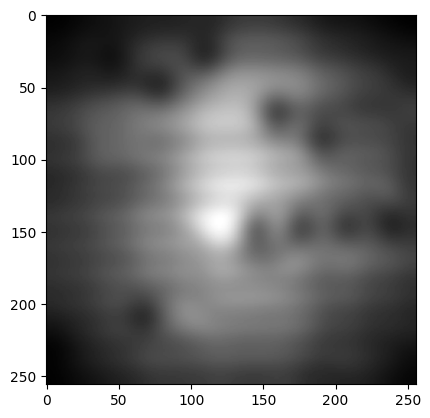

In [166]:
imagen_desenfocada = cv2.GaussianBlur(imagen_filtrada, (51, 51), 0)

plt.imshow(imagen_desenfocada, cmap= 'gray')
plt.show()


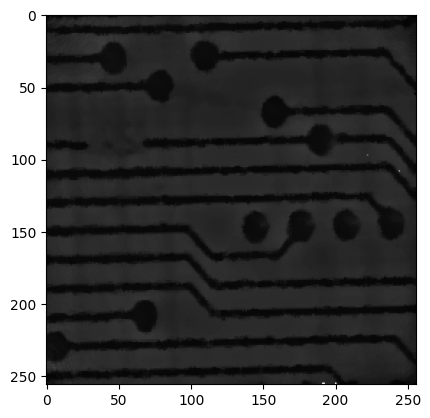

In [167]:
# Restar la imagen desenfocada para eliminar sombras
imagen_sin_sombras = cv2.divide(imagen_filtrada.astype(np.float32), (imagen_desenfocada // 2).astype(np.float32))
plt.imshow(imagen_sin_sombras, cmap= 'gray')
plt.show()

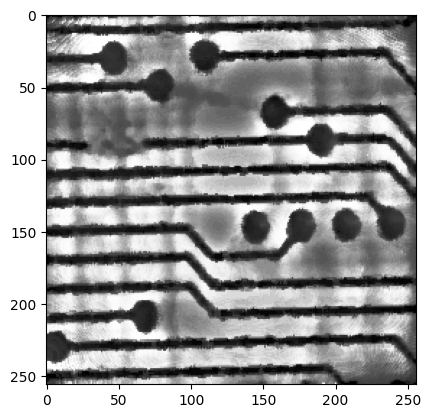

In [168]:
imagen_resultado = cv2.normalize(imagen_sin_sombras, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

imagen_resultado = np.clip(imagen_resultado, 0, 255)  
imagen_resultado = imagen_resultado.astype(np.uint8) 

imagen_resultado = cv2.equalizeHist(imagen_resultado)

# Guardar y mostrar la imagen final
plt.imshow(imagen_resultado, cmap= 'gray')
plt.show()

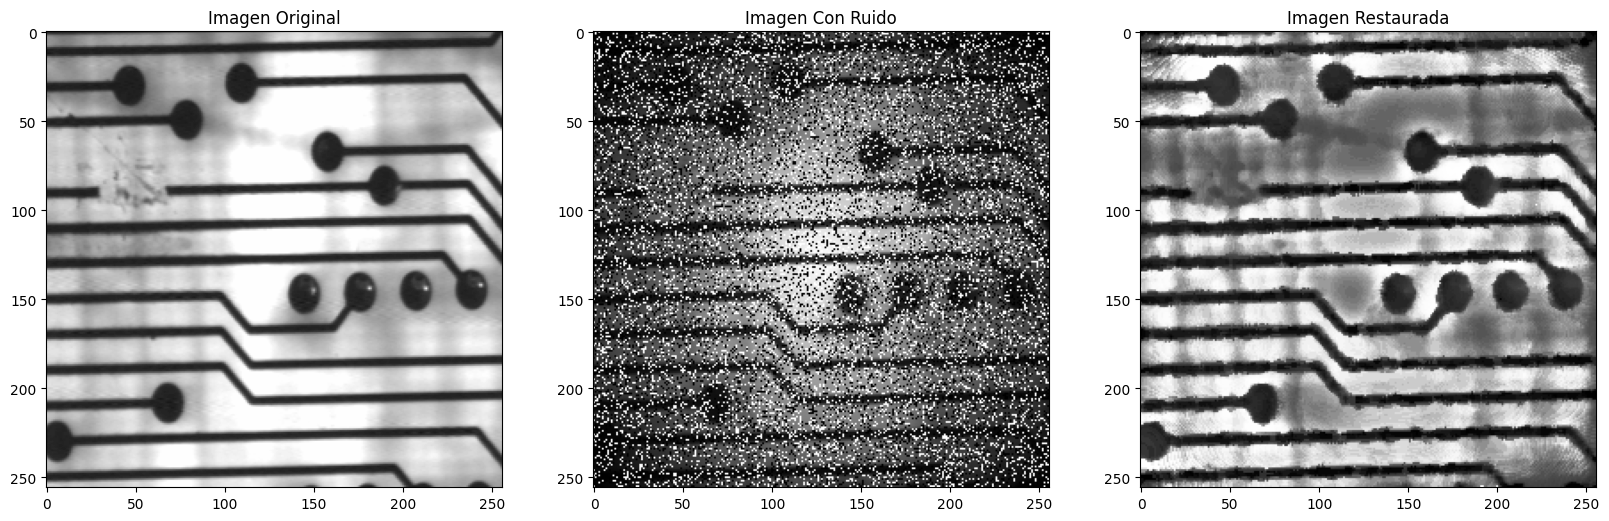

In [169]:
circuit_ = cv2.imread("images/circuit.png", cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1,3, figsize = (20,10)) 
axes[0].imshow(circuit_, cmap= 'gray', vmin = 0, vmax= 255)
axes[0].set_title('Imagen Original')
axes[1].imshow(circuit, cmap= 'gray', vmin = 0, vmax= 255)
axes[1].set_title('Imagen Con Ruido')
axes[2].imshow(imagen_resultado, cmap= 'gray', vmin = 0, vmax= 255)
axes[2].set_title('Imagen Restaurada')
plt.show()